In [259]:
import matplotlib.pyplot as plt
import seaborn as sns
from chart_studio import plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
import numpy as np
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import pandas as pd 
countries_of_interest_df = pd.read_csv("merged_Dataset.csv")

C:\Users\samue\AppData\Local\Temp\ipykernel_36288\993136843.py:11: DtypeWarning:

Columns (147,149,150,151,153,155,156,157) have mixed types. Specify dtype option on import or set low_memory=False.



Helper Functions

In [260]:
#this function will be used to get the total number of people migrated from a country in the given year, if you dont provide the destination country
#then you will get the total number of people migrated from the origin country regarless of the destination country

def col_sum( source, year,gender,age, type, origin_country=None, destination_country = None):
    """
        source : String 
               for dataset from EUROSTAT 'ESTAT'
               for dataset from UN 'UN'
        
        year :String 
                year for the data
        gender : String 
                'T' for both, 
                'M' for Male, 
                'F' for Female
        age : String 
                'T' for all ages, 
                for below 15 '<15', 
                between 15- 64 '15-64',
                above 64 '>64',
        type : String 
               for citizen type migration 'cit',
               for residence type migration 'res'
        origin_country : String 
                name of the origin country
        origin_country: String  
                name of the origin country
        destination_country : 
                String name of the destination country
        
    
    """
    if origin_country and destination_country:
        
        value = countries_of_interest_df[(countries_of_interest_df['origin_name']==origin_country) & (countries_of_interest_df['destination_name']==destination_country)][f'{source}_{year}_{gender}_{age}_{type}'].sum()

    elif origin_country:
        
        value = countries_of_interest_df[(countries_of_interest_df['origin_name']==origin_country)][f'{source}_{year}_{gender}_{age}_{type}'].sum()
    
    return value




In [261]:
#this function with the help of col_sum() function will built a bar graph for a country showing the total number of people, 
#total number of male and total number of female migrated from that country in the time span of 5 years from 2014-2019 for ESTAT
#and from 2015-2019 for UN dataset
def bar_graph_of_country(origin_country, source, type):
    '''
        source : String 
               for dataset from EUROSTAT 'ESTAT'
               for dataset from UN 'UN'
        origin_country: String  
                name of the origin country
        type : String 
               for citizen type migration 'cit',
               for residence type migration 'res'
    '''
    if source == "UN": #for UN we have data for the years 2015-2019
        graph_for_a_country = {'2015':{'Both':col_sum(source, "2015", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2015", "M", "T", type, origin_country  ),'Female': col_sum(source, "2015", "F", "T", type, origin_country  )},
                                                                                    '2016':{'Both':col_sum(source, "2016", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2016", "M", "T", type, origin_country  ),'Female': col_sum(source, "2016", "F", "T", type, origin_country  )},
                                                                                    '2017':{'Both':col_sum(source, "2017", "T", "T", type, origin_country ), 'Male':col_sum(source, "2017", "M", "T", type, origin_country  ),'Female': col_sum(source, "2017", "F", "T", type, origin_country  )},
                                                                                    '2018':{'Both':col_sum(source, "2018", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2018", "M", "T", type, origin_country  ),'Female': col_sum(source, "2018", "F", "T", type, origin_country  )},
                                                                                    '2019':{'Both':col_sum(source, "2019", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2019", "M", "T", type, origin_country  ),'Female': col_sum(source, "2019", "F", "T", type, origin_country )}
                                                                                    }

    else: #for ESTAT we have data for the years 2014-2019
        graph_for_a_country = {'2014':{'Both':col_sum(source, "2014", "T", "T", type, origin_country ), 'Male':col_sum(source, "2014", "M", "T", type, origin_country  ),'Female': col_sum(source, "2014", "F", "T", type, origin_country  )},
                                                                                    '2015':{'Both':col_sum(source, "2015", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2015", "M", "T", type, origin_country  ),'Female': col_sum(source, "2015", "F", "T", type, origin_country  )},
                                                                                    '2016':{'Both':col_sum(source, "2016", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2016", "M", "T", type, origin_country  ),'Female': col_sum(source, "2016", "F", "T", type, origin_country  )},
                                                                                    '2017':{'Both':col_sum(source, "2017", "T", "T", type, origin_country ), 'Male':col_sum(source, "2017", "M", "T", type, origin_country  ),'Female': col_sum(source, "2017", "F", "T", type, origin_country  )},
                                                                                    '2018':{'Both':col_sum(source, "2018", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2018", "M", "T", type, origin_country  ),'Female': col_sum(source, "2018", "F", "T", type, origin_country  )},
                                                                                    '2019':{'Both':col_sum(source, "2019", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2019", "M", "T", type, origin_country  ),'Female': col_sum(source, "2019", "F", "T", type, origin_country )}
                                                                                    }
    
    return graph_for_a_country

    
    

Bar graph showing Male, Female and Both(Male and Female) ratio of the imigrants with residence status in the respective years w.r.t the origin country. The results are for ESTAT dataset.

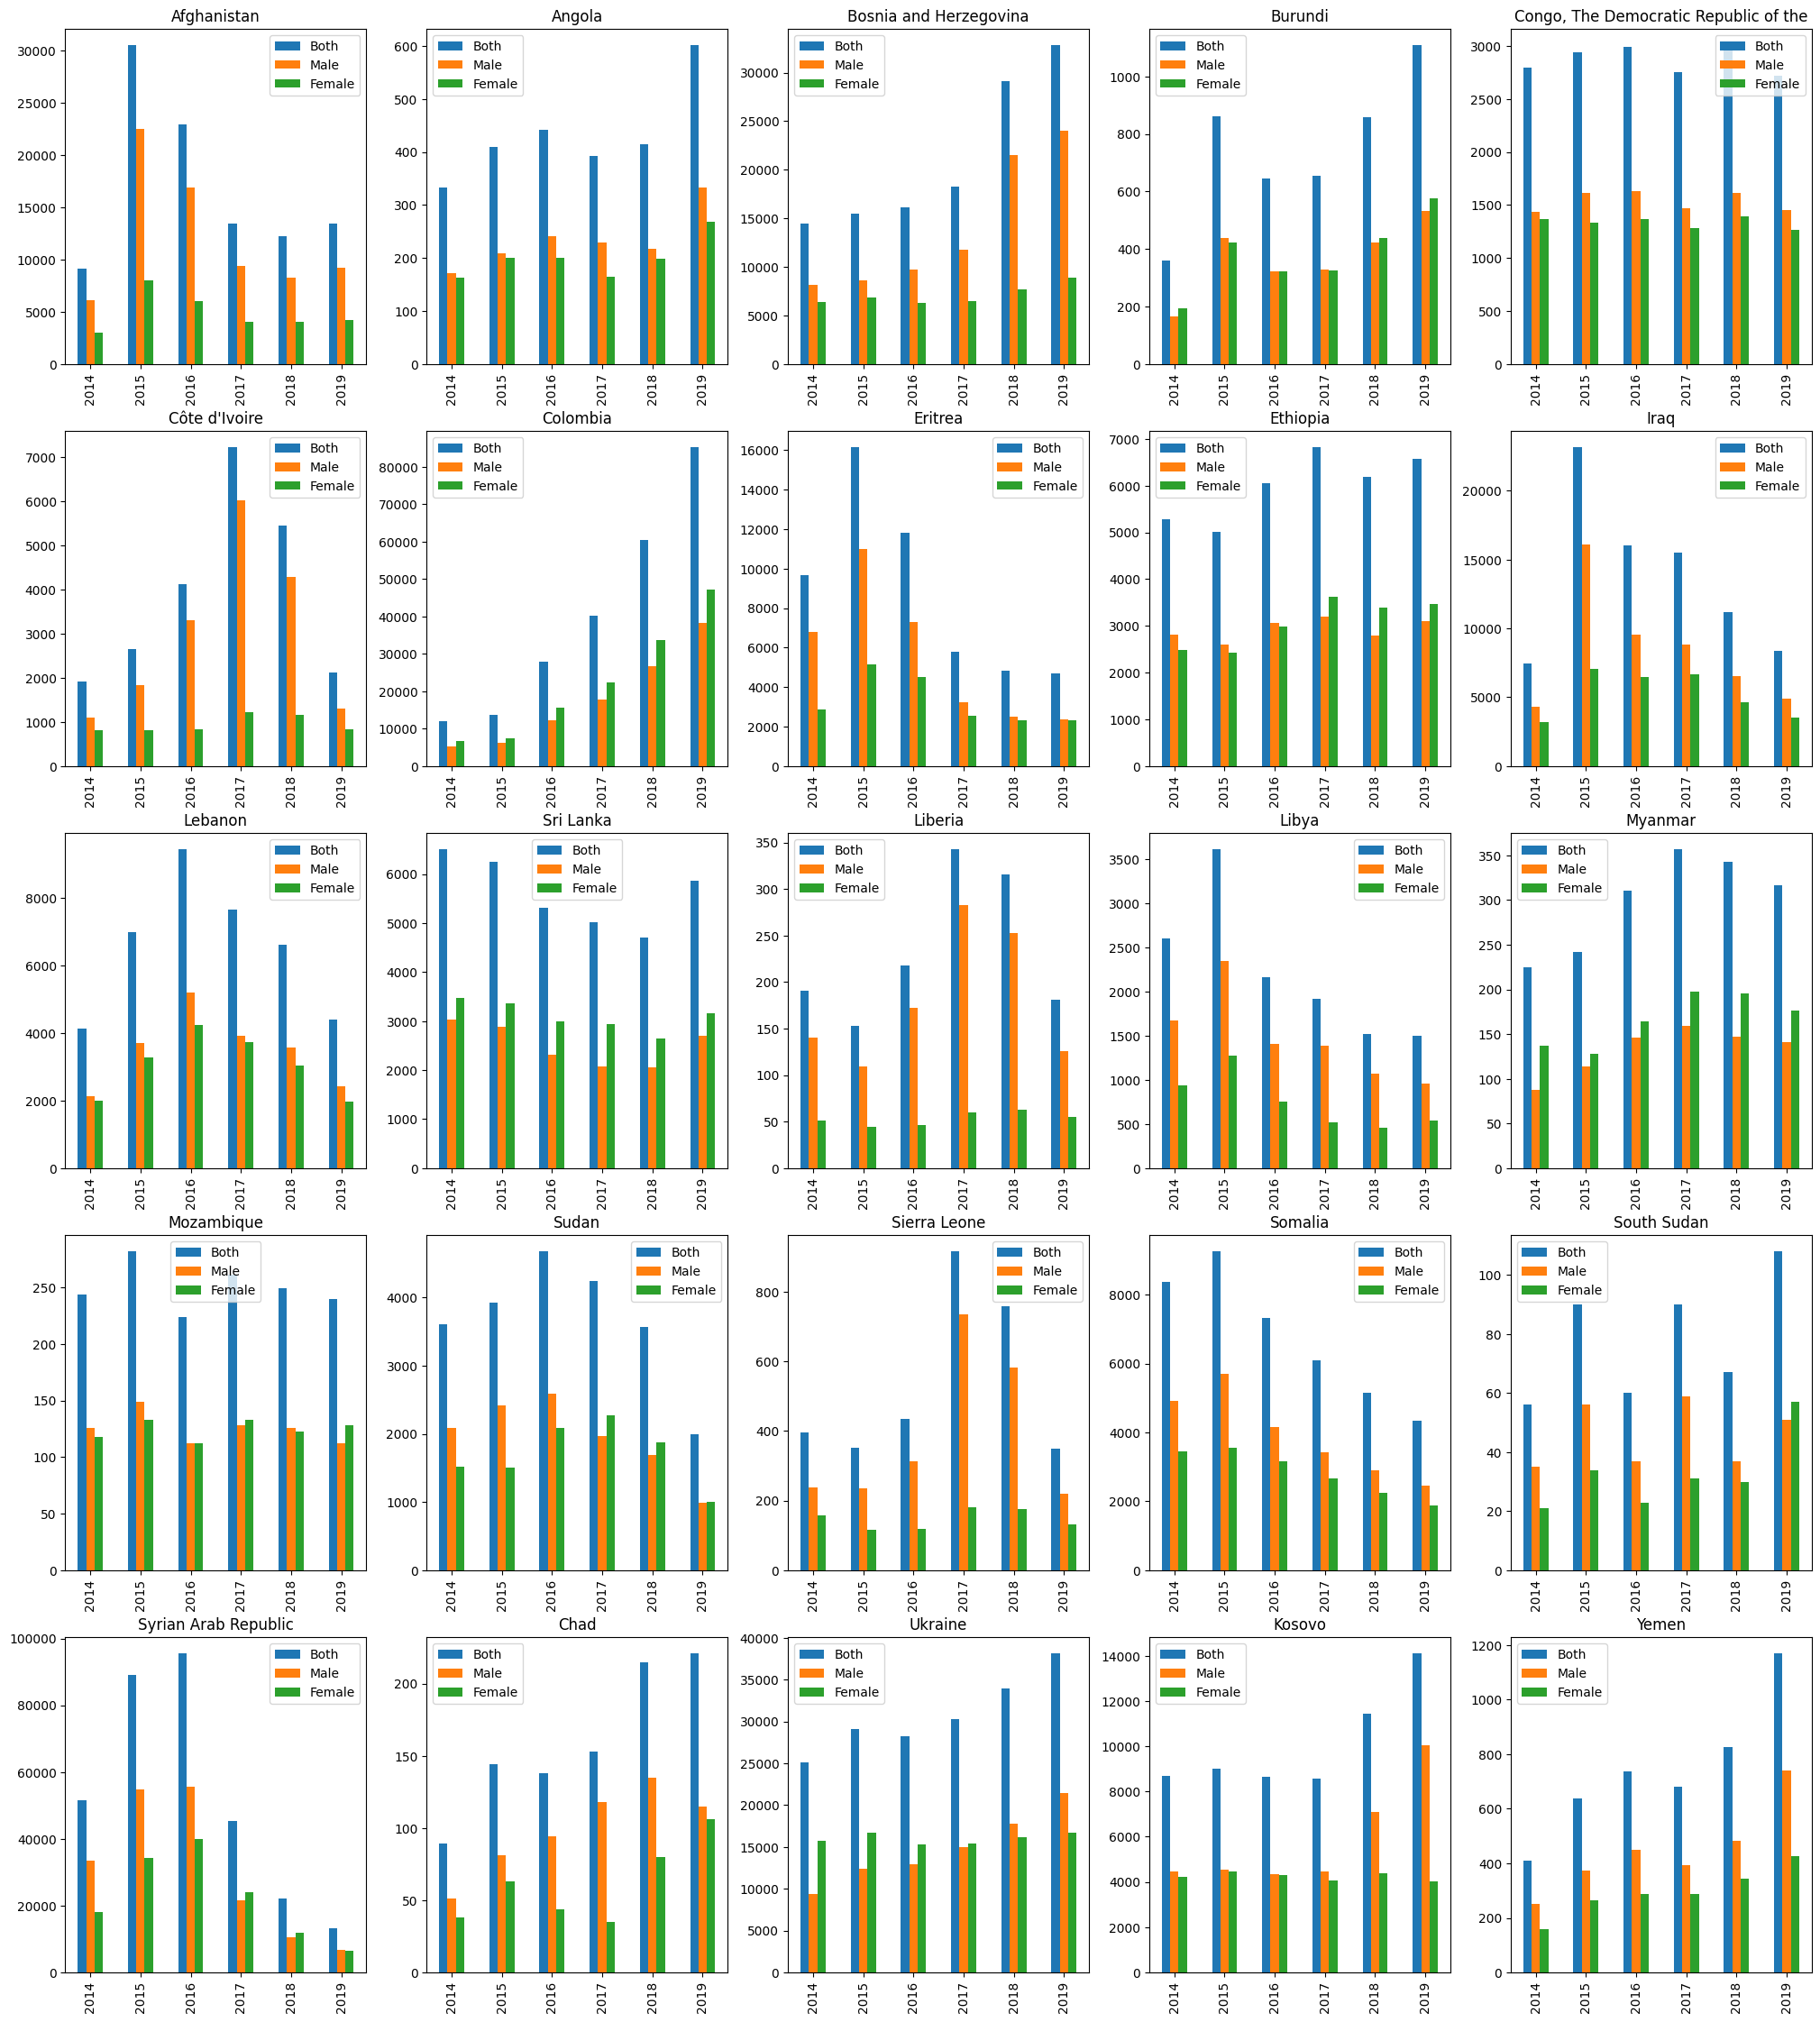

In [262]:

#geting a list of the unique country names
country_names = countries_of_interest_df['origin_name'].unique().tolist()
#dividing the single list into 5 nested lists for convenience for the later part where we will plot graph
country_names = [country_names[i:i+5] for i in range(0, len(country_names), 5)]
fig, axes = plt.subplots(5, 5, figsize=(25,28))
#by making nested lists we can iterated over the country names and also plot the graph at the given axis easily
for i in range(0,5):
    for j in range(0,5):
        graph_for_a_country = bar_graph_of_country(country_names[i][j], "ESTAT", "res")
        x = pd.DataFrame(graph_for_a_country)
        #this is the part where our nested list will come handy, we can use the same i and j indices for axis[i,j] 
        #that we used above to fetch country name
        x.transpose().plot(ax=axes[i,j], kind='bar', title= country_names[i][j])
    






Bar graph showing Male, Female and Both(Male and Female) ratio of the imigrants with citizenship status in the respective years w.r.t the origin country. The results are for ESTAT dataset.

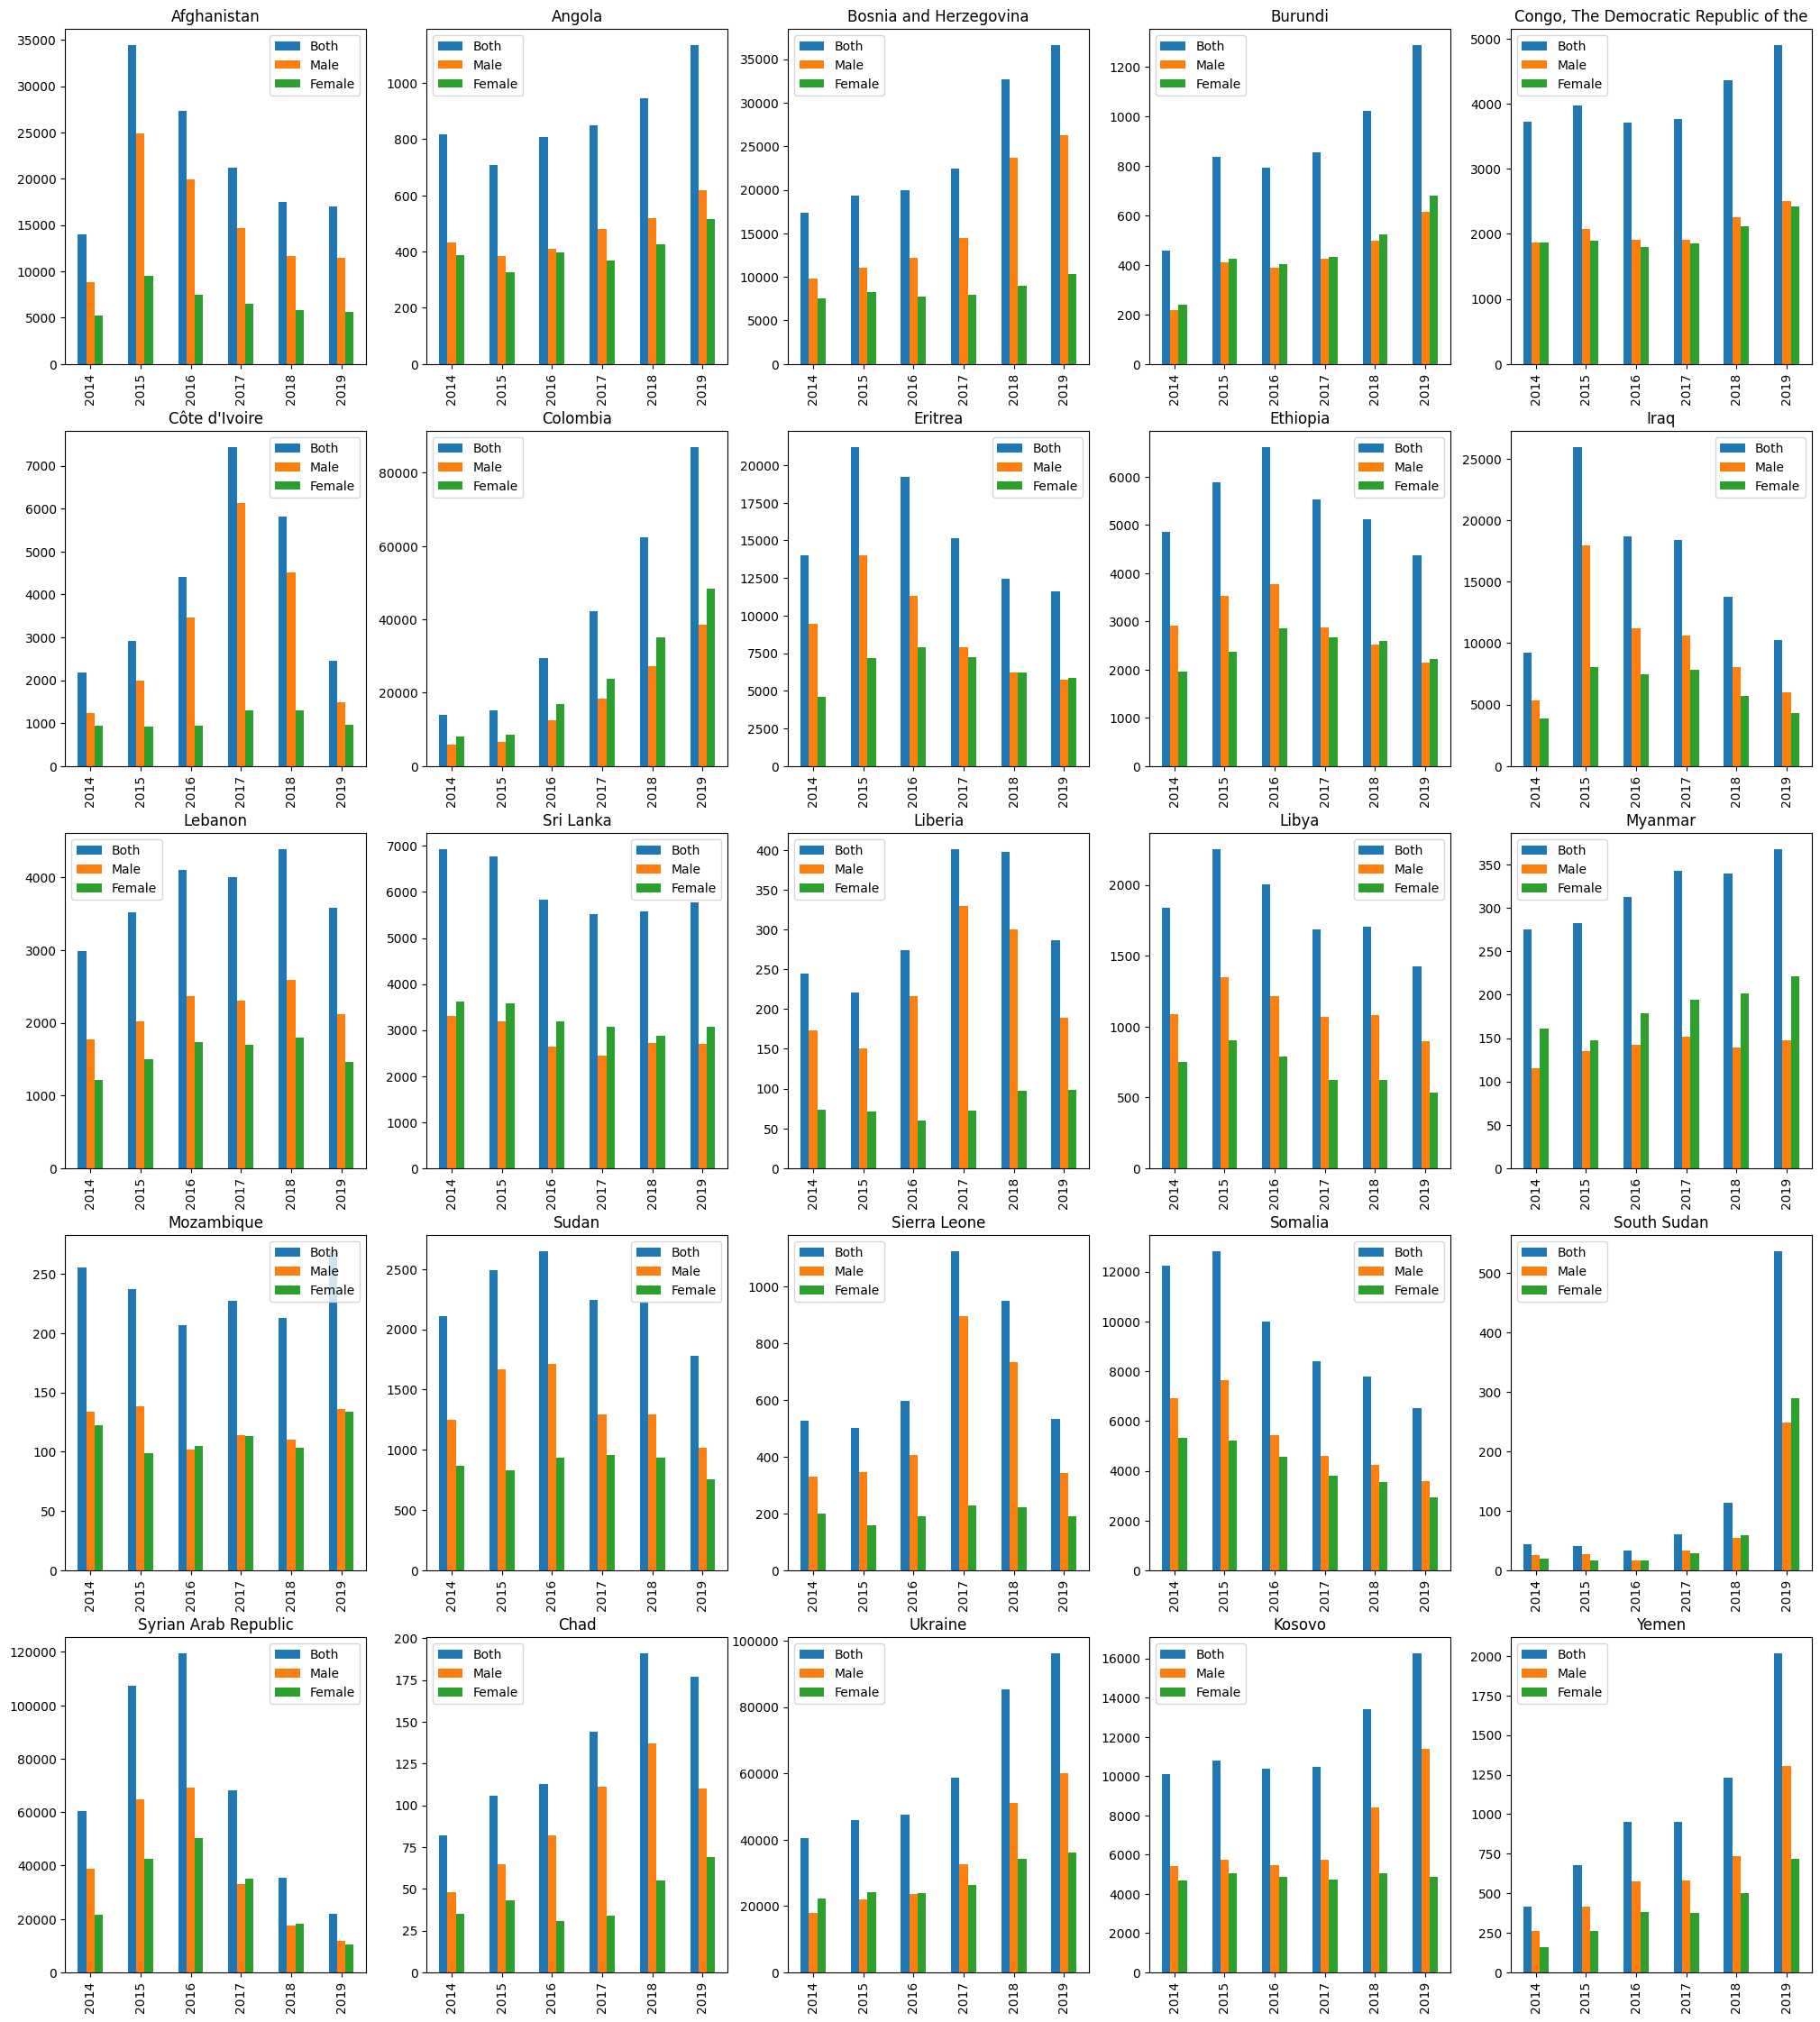

In [263]:
#geting a list of the unique country names
country_names = countries_of_interest_df['origin_name'].unique().tolist()
#dividing the single list into 5 nested lists for convenience for the later part where we will plot graph
country_names = [country_names[i:i+5] for i in range(0, len(country_names), 5)]
fig, axes = plt.subplots(5, 5, figsize=(25,28))
#by making nested lists we can iterated over the country names and also plot the graph at the given axis easily
for i in range(0,5):
    for j in range(0,5):
        graph_for_a_country = bar_graph_of_country(country_names[i][j], "ESTAT", "cit")
        x = pd.DataFrame(graph_for_a_country)
        #this is the part where our nested list will come handy, we can use the same i and j indices for axis[i,j] 
        #that we used above to fetch country name
        x.transpose().plot(ax=axes[i,j], kind='bar', title= country_names[i][j])

Seperated DataFrame which shows total number of emigrants from the origin countries who left their countries to seek residence in 6 years(2014-2019)

In [264]:
residence_perpose = countries_of_interest_df
residence_perpose['residence_sum_5_years'] = residence_perpose['ESTAT_2014_F_T_res'] + residence_perpose['ESTAT_2015_F_T_res'] + residence_perpose['ESTAT_2016_F_T_res'] + residence_perpose['ESTAT_2017_F_T_res']+residence_perpose['ESTAT_2018_F_T_res']+residence_perpose['ESTAT_2019_F_T_res']

group_residence = residence_perpose.groupby(['origin_name', 'origin_alpha_3'])
group_residence = group_residence.agg({'residence_sum_5_years': np.sum})

group_residence = pd.DataFrame(group_residence)
group_residence = group_residence.reset_index()


# sum_group_residence = group_residence['residence_sum_5_years'].sum()
# sum_group_residence = pd.DataFrame(sum_group_residence)
# sum_group_residence['origin_name']
# # size = group.agg({'destination_name':[np.size]})
# group[['ESTAT_2014_F_T_res']+['ESTAT_2015_F_T_res']].


C:\Users\samue\AppData\Local\Temp\ipykernel_36288\1282738831.py:5: FutureWarning:

The provided callable <function sum at 0x000002716C044720> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



In [265]:


init_notebook_mode(connected=True) 
data = dict(type = 'choropleth',
            locations = group_residence['origin_alpha_3'],
            locationmode = 'ISO-3',
            colorscale= 'temps',
            
            text= group_residence['origin_name'],
            z=group_residence['residence_sum_5_years'],
            colorbar = {'title':'Number of migrants'})
layout = dict(geo = {'scope':'world'}, title= "Graph showing number of migrants from Post conflict contries with Residence status")
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

Seperated DataFrame which shows total number of emigrants from the origin countries who left their countries to seek citizenship in 6 years(2014-2019)

In [266]:
citizen_perpose = countries_of_interest_df
citizen_perpose['citizen_sum_5_years'] = citizen_perpose['ESTAT_2014_F_T_cit'] + citizen_perpose['ESTAT_2015_F_T_cit'] + citizen_perpose['ESTAT_2016_F_T_cit'] + citizen_perpose['ESTAT_2017_F_T_cit']+citizen_perpose['ESTAT_2018_F_T_res']+citizen_perpose['ESTAT_2019_F_T_cit']

group_citizen = citizen_perpose.groupby(['origin_name', 'origin_alpha_3'])
group_citizen = group_citizen.agg({'citizen_sum_5_years': np.sum})

group_citizen = pd.DataFrame(group_citizen)
group_citizen = group_citizen.reset_index()
group_citizen

C:\Users\samue\AppData\Local\Temp\ipykernel_36288\2014147544.py:5: FutureWarning:

The provided callable <function sum at 0x000002716C044720> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



,origin_name,origin_alpha_3,citizen_sum_5_years
0,Afghanistan,AFG,37865.0
1,Angola,AGO,1977.0
2,Bosnia and Herzegovina,BIH,48685.0
3,Burundi,BDI,2591.0
4,Chad,TCD,288.0
5,Colombia,COL,138902.0
6,"Congo, The Democratic Republic of the",COD,11058.0
7,Côte d'Ivoire,CIV,6067.0
8,Eritrea,ERI,34732.0
9,Ethiopia,ETH,15296.0


In [267]:
#ploting countries on worldmap
data = dict(type = 'choropleth',
            locations = group_citizen['origin_alpha_3'],
            locationmode = 'ISO-3',
            colorscale= 'temps',
            
            text= group_citizen['origin_name'],
            z=group_citizen['citizen_sum_5_years'],
            colorbar = {'title':'Number of migrants'})
layout = dict(geo = {'scope':'world'}, title= "Graph showing number of migrants from Post conflict contries with Citizen Status")
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [268]:
#to seperate numeric type columns for Analysis
data = []
for i in countries_of_interest_df.columns:
    if is_numeric_dtype(countries_of_interest_df[i]):
        data.append(i)
    
print(data)

['ESTAT_2014_T_T_cit', 'ESTAT_2014_T_T_res', 'ESTAT_2014_T_<15_cit', 'ESTAT_2014_T_<15_res', 'ESTAT_2014_T_15-64_cit', 'ESTAT_2014_T_15-64_res', 'ESTAT_2014_T_>64_cit', 'ESTAT_2014_T_>64_res', 'ESTAT_2014_M_T_cit', 'ESTAT_2014_M_T_res', 'ESTAT_2014_M_<15_cit', 'ESTAT_2014_M_<15_res', 'ESTAT_2014_M_15-64_cit', 'ESTAT_2014_M_15-64_res', 'ESTAT_2014_M_>64_cit', 'ESTAT_2014_M_>64_res', 'ESTAT_2014_F_T_cit', 'ESTAT_2014_F_T_res', 'ESTAT_2014_F_<15_cit', 'ESTAT_2014_F_<15_res', 'ESTAT_2014_F_15-64_cit', 'ESTAT_2014_F_15-64_res', 'ESTAT_2014_F_>64_cit', 'ESTAT_2014_F_>64_res', 'ESTAT_2015_T_T_cit', 'ESTAT_2015_T_T_res', 'ESTAT_2015_T_<15_cit', 'ESTAT_2015_T_<15_res', 'ESTAT_2015_T_15-64_cit', 'ESTAT_2015_T_15-64_res', 'ESTAT_2015_T_>64_cit', 'ESTAT_2015_T_>64_res', 'ESTAT_2015_M_T_cit', 'ESTAT_2015_M_T_res', 'ESTAT_2015_M_<15_cit', 'ESTAT_2015_M_<15_res', 'ESTAT_2015_M_15-64_cit', 'ESTAT_2015_M_15-64_res', 'ESTAT_2015_M_>64_cit', 'ESTAT_2015_M_>64_res', 'ESTAT_2015_F_T_cit', 'ESTAT_2015_F_T_r

Relation between origin countries GDP and number of migrants over the period of 6 years (2014-2019)

C:\Users\samue\AppData\Local\Temp\ipykernel_36288\2333313886.py:10: FutureWarning:

The provided callable <function sum at 0x000002716C044720> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

C:\Users\samue\AppData\Local\Temp\ipykernel_36288\2333313886.py:10: FutureWarning:

The provided callable <function sum at 0x000002716C044720> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



Text(0.5, 1.0, 'Relationship between origin countries GDP and Number of emmigrants')

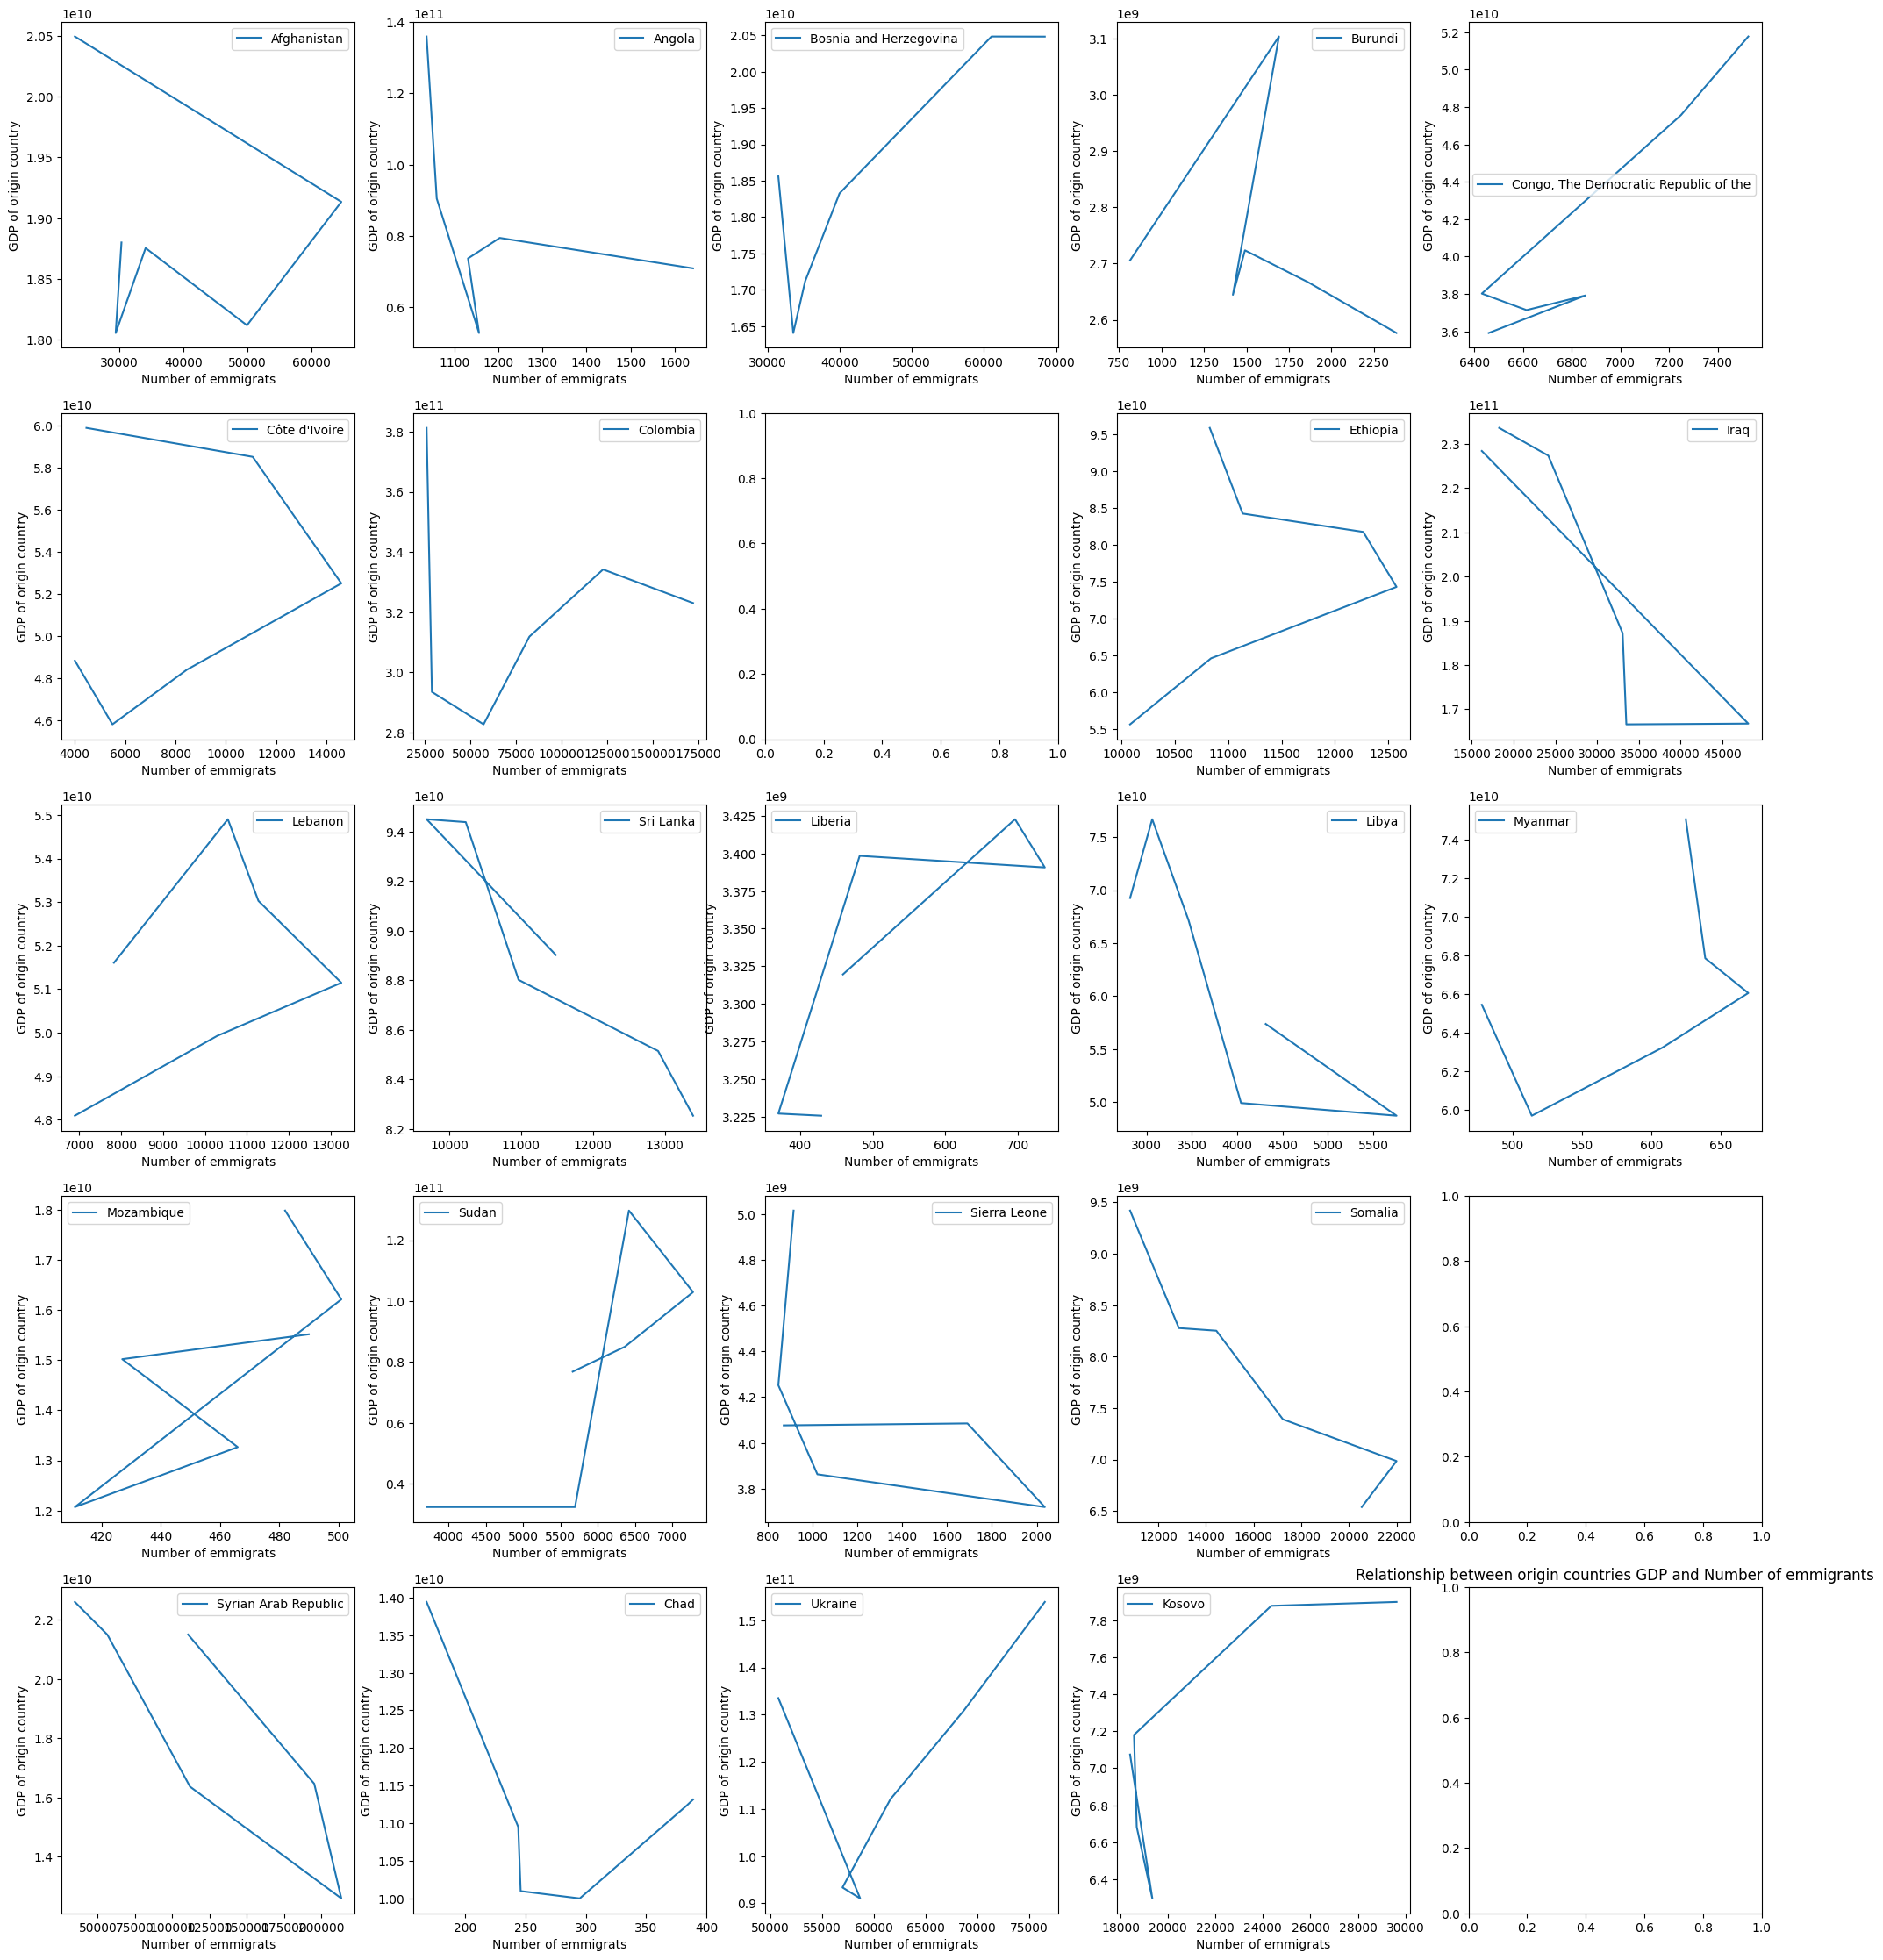

In [270]:
GDP=  countries_of_interest_df
#seperate columns for total of resident and citizen emmigrants
GDP ['Estst_Total_migrant_2014'] = GDP['ESTAT_2014_T_T_cit']+GDP['ESTAT_2014_T_T_res']
GDP ['Estst_Total_migrant_2015'] = GDP['ESTAT_2015_T_T_cit']+GDP['ESTAT_2015_T_T_res']
GDP ['Estst_Total_migrant_2016'] = GDP['ESTAT_2016_T_T_cit']+GDP['ESTAT_2016_T_T_res']
GDP ['Estst_Total_migrant_2017'] = GDP['ESTAT_2017_T_T_cit']+GDP['ESTAT_2017_T_T_res']
GDP ['Estst_Total_migrant_2018'] = GDP['ESTAT_2018_T_T_cit']+GDP['ESTAT_2018_T_T_res']
GDP ['Estst_Total_migrant_2019'] = GDP['ESTAT_2019_T_T_cit']+GDP['ESTAT_2019_T_T_res']
gdp_group = GDP.groupby(['origin_name','origin_gdp_2014','origin_gdp_2015','origin_gdp_2016','origin_gdp_2017','origin_gdp_2018','origin_gdp_2019'])
group_cit_gdp = gdp_group.agg({'Estst_Total_migrant_2014': np.sum,
                               'Estst_Total_migrant_2015': np.sum,
                                   'Estst_Total_migrant_2016': np.sum,
                                   'Estst_Total_migrant_2017': np.sum,
                                   'Estst_Total_migrant_2018': np.sum,
                                   'Estst_Total_migrant_2019': np.sum})

group_cit_gdp
group_cit_gdp = pd.DataFrame(group_cit_gdp)
group_cit_gdp=group_cit_gdp.reset_index()

#columns for x axis values
X = ['Estst_Total_migrant_2014','Estst_Total_migrant_2015','Estst_Total_migrant_2016',
                                   'Estst_Total_migrant_2017',
                                   'Estst_Total_migrant_2018',
                                   'Estst_Total_migrant_2019']
#columns for y axis values
Y = ['origin_gdp_2014','origin_gdp_2015','origin_gdp_2016','origin_gdp_2017','origin_gdp_2018','origin_gdp_2019']


empty = ['Eritrea','South Sudan', 'Yemen'] #countries whos gdp is missing in the data
fig,ax = plt.subplots(5,5, figsize=(25,28))


for i in range(0,5):
    for j in range(0,5):
        x=[]
        y=[]
        
        if country_names[i][j] not in empty:
            for E in X:
                x.append(group_cit_gdp[group_cit_gdp['origin_name']==country_names[i][j]][E].item())
            for G in Y:
                y.append(group_cit_gdp[group_cit_gdp['origin_name']==country_names[i][j]][G].item())
            ax[i][j].plot(x,y, label=f"{country_names[i][j]}")
            ax[i][j].set_xlabel("Number of emmigrats")
            ax[i][j].set_ylabel("GDP of origin country")
    
            ax[i][j].legend()
        
plt.title("Relationship between origin countries GDP and Number of emmigrants")